In [1]:
#importing packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt

# Gather

In [2]:
# Reading the downloaded csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Downloading the file programmatically from udacity's server
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

#writing the response content into the file
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Reading the tsv file    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Twitter API keys, secrets, and tokens 
consumer_key = 'as09WFDUnuj8UlZXz54Ofj5SU'
consumer_secret = 'VCnfdYo9j8G9y2izH0AzPPk8y5VOGYPmArpqhnmlBeCEDswA0f'
access_token = '879210388004388864-U2LAxsXgAuqxP7YYcosMpQR8zTvZwuc'
access_secret = 'TCIYrDYoEKaF0Lsz6TCA7AGW8Xtd7geTGqT3PCsgpzmzh'

In [5]:
# Oauth authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# Quering twitter using the api and writing it into the file tweet_json.txt
with open('tweet_json.txt', 'w', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 642
Rate limit reached. Sleeping for: 651


In [4]:
# Appending each tweet from the file tweet_json.txt into a list
tweets = []

with open('tweet_json.txt', "r") as f:
    for line in f:
        try:
            tweet = json.loads(line)
            tweets.append(tweet)
        except:
            continue

In [5]:
# Creating tweet_info DataFrame
tweet_info = pd.DataFrame()

In [6]:
# Adding selected variables to tweet_info DataFrame
tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

# Assess

In [7]:
# Top 5 data in twitter_archive DdtaFrame
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
#summary of twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# General description about twitter_archive DataFrame
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# Top 5 data from image_prediction DataFrame
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
# Summary of image_prediction DataFrame
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
# General description about image_prediction DataFrame
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
# Top 5 data from tweet_info DataFrame
tweet_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8718,39162
1,892177421306343426,6394,33540
2,891815181378084864,4251,25277
3,891689557279858688,8814,42534
4,891327558926688256,9596,40705


In [14]:
# Summary of tweet_info DataFrame
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 3 columns):
tweet_id          2348 non-null int64
retweet_count     2348 non-null int64
favorite_count    2348 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [15]:
# General description about tweet_info DataFrame
tweet_info.describe()

,tweet_id,retweet_count,favorite_count
count,2.348000e+03,2348.000000,2348.000000
mean,7.424145e+17,3073.094974,8112.433135
std,6.837627e+16,5098.538942,12192.020825
min,6.660209e+17,0.000000,0.000000
25%,6.783868e+17,612.750000,1408.500000
50%,7.191522e+17,1435.500000,3570.000000
75%,7.987607e+17,3578.000000,10065.250000
max,8.924206e+17,78354.000000,143664.000000


In [16]:
 # Sorting the 'name' column of the tweet_archive DataFrame
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [17]:
# Converting the values of 'name' column of twitter_archive DataFrame into lower case
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [18]:
# Number of rows in 'name' column of twitter_archive having value as 'None'
(twitter_archive['name'] == 'None').sum()

745

In [19]:
# Number of unique values in 'source' column of the twitter_archive DataFrame
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality issues 
- DataFrame contains retweets that has to be removed
- Missing images in some tweets. Those tweets are also supposed to be removed
- 'None' in 'name' column should be changed to 'NaN'
- Unwanted data in 'source' column which reduces readability should be altered
- Numerator of the rating contains decimal values
- Denominator of the rating contains other than 10.0
- Incorrect data types in some columns (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, rating_numerator, rating_denominator)
- Partial display of 'text' column contents should be made correct

### Tidiness issues
- Dog stages in 4 different columns
- 'text' column contains two different values
- Integrating 'twitter_archive', 'image_predictions' and 'tweet_info' into a single table


# Clean

In [20]:
# Creating copies of the DataFrames
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

#### Define
Remove retweets from the tweet_archive_clean data frame

#### Code

In [21]:
# Saving the rows with null values in 'retweeted_status_id' column alone to the twitter_archive_clean DataFrame
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [22]:
# Chechking the non-null values of columns containing retweeted data
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define
Remove columns which has retweeted information.

#### Code

In [23]:
# Removing the columns containing data about retweet from the twitter_archive_clean DataFrame
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

#### Test

In [24]:
# Checking the number of columns
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Define
Remove rows from twitter_archieve_clean where the extended_url(contains images) are NULL

#### Code

In [25]:
# Removing the rows with 'NaN' in 'expanded_url' column of the twitter_archive_clean DataFrame
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [26]:
# Checking the non-null values in 'expanded_url' column
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


#### Define
Replace 'None' value in the column 'Name' with NaN

#### Code

In [27]:
# Replacing the 'None' value with 'NaN' in the 'name' column of the twitter_archive_clean DataFrame
twitter_archive_clean['name']=twitter_archive_clean['name'].replace('None',np.NaN)

#### Test

In [28]:
# Checking for non-null values in 'name' column
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     1495 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


#### Define 
Alter the 'source' column to more readable form by removing the anchor tags 

#### Code

In [29]:
# Remove anchor tags from 'source' column in twitter_archive_clean DataFrame
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [30]:
# Checking for the value counts in 'source' column
twitter_archive_clean['source'].value_counts()

Twitter for iPhone    1985
Vine                    91
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

#### Define 
Change the data type of the columns, timestam, tweet_id, in_reply_to_status_id, in_reply_to_user_id, source, rating_numerator and rating_denominator.  

#### Code 

In [31]:
# Chaning the data type of the columns
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
#twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('float')
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('str')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('str')

#### Test 

In [32]:
# Checking the data type of the changed columns
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    2117 non-null object
in_reply_to_user_id      2117 non-null object
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     1495 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 248.1+ KB


#### Define
Changing the rating numerator with decimal values 

#### Code

In [33]:
# Setting the column width to the maximum
pd.set_option('display.max_colwidth', -1)

# Extracting rating numerator from the 'text' column using regular expression
temp = twitter_archive_clean.text.str.extract('(\d+\.\d+\/)').dropna()

# Number of values in temp
n=temp.count()

#Removing the '/' from each value
for i in range (0,n):
    temp.values[i] = temp.values[i][:-1]

# Changing the data type of all the value to float    
temp.values.astype('float')

#Replacing the ratings numerator with the actual decimal value
for i in range (0,n):
    twitter_archive_clean.rating_numerator.loc[temp.index[i]] = float(temp.values[i])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [34]:
# Checking rating's numerator with decimal value
twitter_archive_clean[twitter_archive_clean.text.str.contains('(\d+\.\d+\/)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,nan,nan,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,None,None,None,None
695,786709082849828864,nan,nan,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,None,None,None,None
763,778027034220126208,nan,nan,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,nan,nan,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,None,None,None,None


#### Define
Replace the rating_denominator with other values to 10.0

#### Code

In [35]:
# Filling the 'rating_denominator' column with the value 10.0
twitter_archive_clean['rating_denominator']=10.0

#### Test

In [36]:
# Checking for values in 'rating_denominator' column other than 10.0 
twitter_archive_clean[twitter_archive_clean.rating_denominator!=10.0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
Creating a 'dog_stage' column to store the stage of a dog and deleting the columns for each stage 

#### Code

In [62]:
# Creating 'dog_stage' column which stores the stage of the dog extracted from the 'text' column of twitter_archive_column DataFrame 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

# Dropping the other columns for dog stage from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

#Changing the data type of the 'dog_stage' column to category
twitter_archive_clean['dog_stage']= twitter_archive_clean['dog_stage'].astype('category')

ValueError: labels ['doggo' 'floofer' 'pupper' 'puppo'] not contained in axis

#### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    2117 non-null object
in_reply_to_user_id      2117 non-null object
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     1495 non-null object
dog_stage                356 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 264.2+ KB


#### Define
Breaking the 'text' column which stores two different values into two different columns

#### Code

In [39]:
# Extracting the link from 'text' column using the regular expression and storing it in a new column 'link' in the twitter_archive_clean DataFrame
for i in twitter_archive_clean.count():
    twitter_archive_clean['link'] = twitter_archive_clean.text.str.findall(r'(https://t.co[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-]?$)')[i][0]

In [40]:
# Replacing the link extraxted using the regular expression with null and storing it in the same column
twitter_archive_clean['text'] = twitter_archive_clean.text.str.replace(r'(https://t.co[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-]?$)','')

#### Test

In [44]:
# Checking the 'text' column
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,link
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,https://t.co/SATN4If5H5
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://t.co/SATN4If5H5
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://t.co/SATN4If5H5
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,https://t.co/SATN4If5H5
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,https://t.co/SATN4If5H5


#### Define
Merging the DataFrames 'twitter_archive_clean', 'image_predictions_clean' and 'tweet_info_clean' into a single DataFrame

#### Code

In [42]:
# Merging the three DataFrames into a single DataFrame
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner')
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_info_clean, on='tweet_id', how='inner')

In [54]:
# Changing the data type before writing it into a csv file
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

#### Test

In [44]:
# Checking the new DataFrame
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1815,669327207240699904,nan,nan,2015-11-25 01:30:16,Twitter for iPhone,Just got home from college. Dis my dog. She does all my homework. Big red turd in background. 13/10 no bias at all,https://twitter.com/dog_rates/status/669327207240699904/photo/1,13.0,10.0,NaN,...,0.919584,True,Labrador_retriever,0.049669,True,kuvasz,0.010216,True,125,605
1397,679722016581222400,nan,nan,2015-12-23 17:55:32,Twitter for iPhone,This is Mike. He is a Jordanian Frito Pilates. Frowning because he can't see directly in front of him. 8/10,https://twitter.com/dog_rates/status/679722016581222400/photo/1,8.0,10.0,Mike,...,0.459604,True,Boston_bull,0.197913,True,French_bulldog,0.087023,True,529,1789
155,853760880890318849,nan,nan,2017-04-17 00:03:50,Twitter for iPhone,Say hello to Alice. I'm told she enjoys car rides and smells good. 12/10 would give her everything she could ever want,https://twitter.com/dog_rates/status/853760880890318849/photo/1,12.0,10.0,Alice,...,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True,6284,30076
1845,668641109086707712,nan,nan,2015-11-23 04:03:57,Twitter for iPhone,Meet Hanz. He heard some thunder. 10/10,https://twitter.com/dog_rates/status/668641109086707712/photo/1,10.0,10.0,Hanz,...,0.432594,False,pug,0.146311,True,toilet_tissue,0.024500,False,569,1129
1840,668815180734689280,nan,nan,2015-11-23 15:35:39,Twitter for iPhone,This is a wild Toblerone from Papua New Guinea. Mouth always open. Addicted to hay. Acts blind. 7/10 handsome dog,https://twitter.com/dog_rates/status/668815180734689280/photo/1,7.0,10.0,a,...,0.461172,True,Italian_greyhound,0.270733,True,miniature_pinscher,0.109752,True,289,599


# Store


In [59]:
# Save clean DataFrame to csv file
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# Analysis and visulaization

In [60]:
# Summary of the cleaned data
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1448 non-null object
dog_stage                326 non-null category
link                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog 

In [61]:
# Descriptive statistics of the data
twitter_archive_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1994.000000,1994.0,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,12.237101,10.0,1.203109,0.593941,1.344195e-01,6.024848e-02,2751.958877,8909.432297
std,41.471197,0.0,0.560777,0.271954,1.006807e-01,5.089067e-02,4743.125097,12622.640458
min,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,14.000000,80.000000
25%,10.000000,10.0,1.000000,0.362857,5.393988e-02,1.619283e-02,615.750000,1953.250000
50%,11.000000,10.0,1.000000,0.587635,1.174550e-01,4.950530e-02,1336.500000,4084.000000
75%,12.000000,10.0,1.000000,0.846285,1.951377e-01,9.159438e-02,3163.750000,11235.750000
max,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,78354.000000,143664.000000


In [48]:
# Tweet containing the maximum rating (numerator)
twitter_archive_clean['text'].iloc[twitter_archive_clean['rating_numerator'].argmax()]

"This is Atticus. He's quite simply America af. 1776/10 "

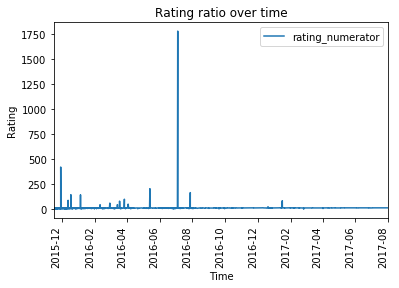

In [50]:
# Plot showing rating(Numerator) with respect to the time
twitter_archive_clean.plot('timestamp', 'rating_numerator')
plt.xticks(rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.title('Rating ratio over time')
plt.show()

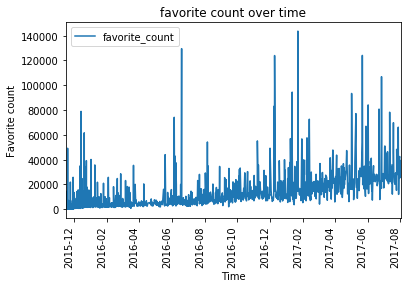

In [51]:
# Plot showing favorite_count with respect to time
twitter_archive_clean.plot('timestamp', 'favorite_count')
plt.xticks(rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Favorite count')
plt.title('favorite count over time')
plt.show()

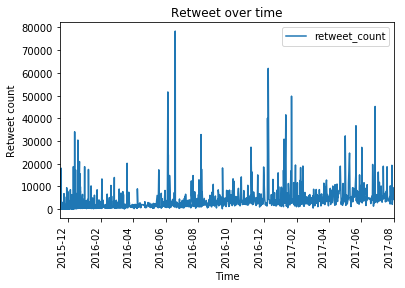

In [52]:
# Plot showing retweet_count with respect to time
twitter_archive_clean.plot('timestamp', 'retweet_count')
plt.xticks(rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Retweet count')
plt.title('Retweet over time')
plt.show()

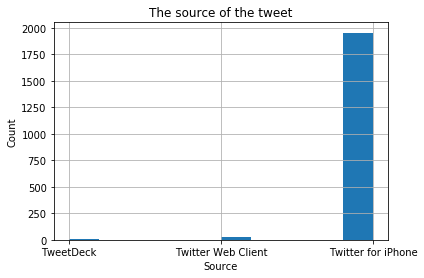

In [53]:
# The plot showing the souce of the tweet
twitter_archive_clean['source'].hist()
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('The source of the tweet')
plt.show()